In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
c_ins_csv=pd.read_csv('claims Original.csv')
insur=pd.DataFrame(c_ins_csv)
insur.head(10) #First 10 rows of the dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,0
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,0
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,0
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,0
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,0


In [2]:
insur.shape

(15420, 33)

There are 15420 observations.
There are 33 features. Out of which 32 are independent features, and 1 ('FraudFound_P') is a dependent feature.

In [3]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
Month                   15420 non-null object
WeekOfMonth             15420 non-null int64
DayOfWeek               15420 non-null object
Make                    15420 non-null object
AccidentArea            15420 non-null object
DayOfWeekClaimed        15420 non-null object
MonthClaimed            15420 non-null object
WeekOfMonthClaimed      15420 non-null int64
Sex                     15420 non-null object
MaritalStatus           15420 non-null object
Age                     15420 non-null int64
Fault                   15420 non-null object
PolicyType              15420 non-null object
VehicleCategory         15420 non-null object
VehiclePrice            15420 non-null object
PolicyNumber            15420 non-null int64
RepNumber               15420 non-null int64
Deductible              15420 non-null int64
DriverRating            15420 non-null int64
Days_Policy_Accident    

The dataset contains only integer and object data types.

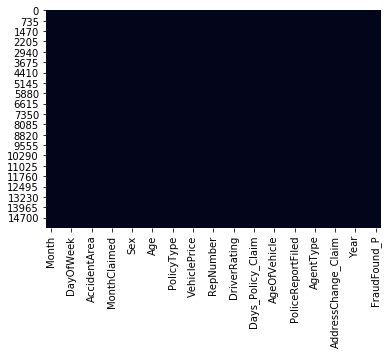

In [4]:
#Visualising the missing values in the dataset using seaborn.heatmap
sns.heatmap(insur.isnull(), cbar=False)

There are no missing elements present in the dataset.

In [5]:
insur.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year,FraudFound_P
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472,0.059857
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313,0.237230
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000,0.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000,0.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000,0.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,1.000000


In [6]:
insur.describe(include=['object'])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


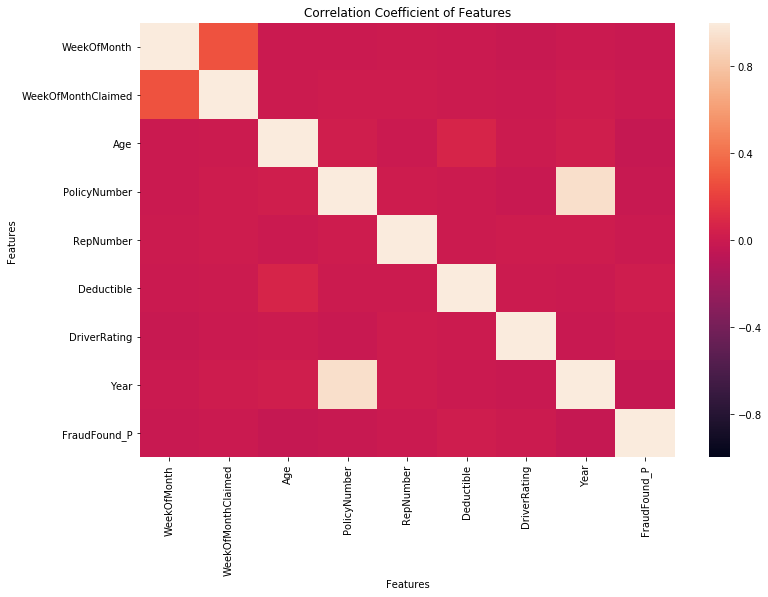

In [7]:
#Plotting a seaborn heatmap of the correlation matrix
insurc=insur.corr()
axes=sns.heatmap(insurc,vmin=-1,vmax=1)
axes.set_xlabel("Features")
axes.set_ylabel("Features")
axes.set_title("Correlation Coefficient of Features")
fig=axes.get_figure()
fig.set_size_inches(12,8)

Text(0.5, 1.0, 'No. of frauds in each month claimed')

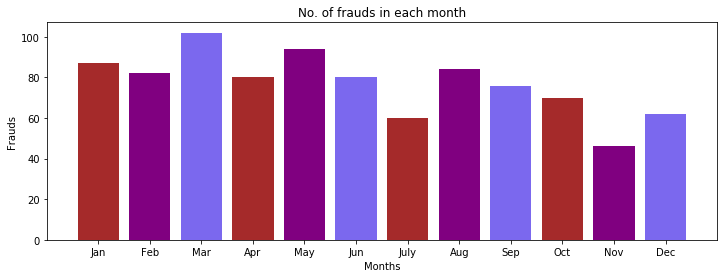

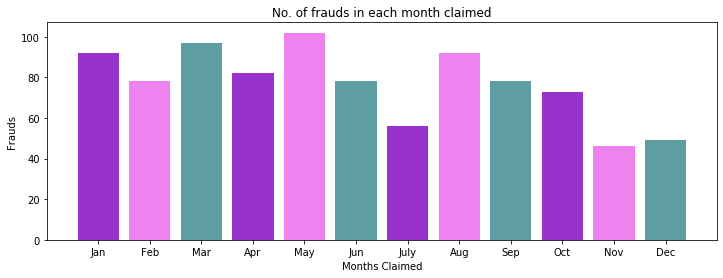

In [8]:
janf=((insur['Month']=='Jan') & (insur['FraudFound_P']==1)).sum();
febf=((insur['Month']=='Feb') & (insur['FraudFound_P']==1)).sum();
marf=((insur['Month']=='Mar') & (insur['FraudFound_P']==1)).sum();
aprf=((insur['Month']=='Apr') & (insur['FraudFound_P']==1)).sum();
mayf=((insur['Month']=='May') & (insur['FraudFound_P']==1)).sum();
junf=((insur['Month']=='Jun') & (insur['FraudFound_P']==1)).sum();
julf=((insur['Month']=='Jul') & (insur['FraudFound_P']==1)).sum();
augf=((insur['Month']=='Aug') & (insur['FraudFound_P']==1)).sum();
sepf=((insur['Month']=='Sep') & (insur['FraudFound_P']==1)).sum();
octf=((insur['Month']=='Oct') & (insur['FraudFound_P']==1)).sum();
novf=((insur['Month']=='Nov') & (insur['FraudFound_P']==1)).sum();
decf=((insur['Month']=='Dec') & (insur['FraudFound_P']==1)).sum();
xdat=np.array([janf,febf,marf,aprf,mayf,junf,julf,augf,sepf,octf,novf,decf])
ydat=np.array(['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.figure(figsize=(12,4))
plt.bar(ydat,xdat, color=['brown','purple','mediumslateblue'])
plt.xlabel('Months')
plt.ylabel('Frauds')
plt.title('No. of frauds in each month')
#print(pd.crosstab(insur['FraudFound_P'], insur['Month']))
############################################################################################################################
janf=((insur['MonthClaimed']=='Jan') & (insur['FraudFound_P']==1)).sum();
febf=((insur['MonthClaimed']=='Feb') & (insur['FraudFound_P']==1)).sum();
marf=((insur['MonthClaimed']=='Mar') & (insur['FraudFound_P']==1)).sum();
aprf=((insur['MonthClaimed']=='Apr') & (insur['FraudFound_P']==1)).sum();
mayf=((insur['MonthClaimed']=='May') & (insur['FraudFound_P']==1)).sum();
junf=((insur['MonthClaimed']=='Jun') & (insur['FraudFound_P']==1)).sum();
julf=((insur['MonthClaimed']=='Jul') & (insur['FraudFound_P']==1)).sum();
augf=((insur['MonthClaimed']=='Aug') & (insur['FraudFound_P']==1)).sum();
sepf=((insur['MonthClaimed']=='Sep') & (insur['FraudFound_P']==1)).sum();
octf=((insur['MonthClaimed']=='Oct') & (insur['FraudFound_P']==1)).sum();
novf=((insur['MonthClaimed']=='Nov') & (insur['FraudFound_P']==1)).sum();
decf=((insur['MonthClaimed']=='Dec') & (insur['FraudFound_P']==1)).sum();
xdat=np.array([janf,febf,marf,aprf,mayf,junf,julf,augf,sepf,octf,novf,decf])
ydat=np.array(['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.figure(figsize=(12,4))
plt.bar(ydat,xdat, color=['darkorchid','violet','cadetblue'])
plt.xlabel('Months Claimed')
plt.ylabel('Frauds')
plt.title('No. of frauds in each month claimed')
#pd.crosstab(insur['FraudFound_P'], insur['MonthClaimed'])

([<matplotlib.patches.Wedge at 0x1f921dc6b38>,
 [Text(1.1416458737101391, 0.3696548377075741, 'Jan'),
  Text(0.7536492816483423, 0.9338162347437198, 'Feb'),
  Text(0.09995215369647709, 1.195830074455161, 'Mar'),
  Text(-0.6023565783609622, 1.0378663461666315, 'Apr'),
  Text(-1.096365270133819, 0.4878352123867225, 'May'),
  Text(-1.1774869359245481, -0.23135365941998656, 'Jun'),
  Text(-0.9552264453036646, -0.7263211673856994, 'July'),
  Text(-0.4859686793676584, -1.097193894748624, 'Aug'),
  Text(0.19316539292783932, -1.1843509323570587, 'Sep'),
  Text(0.7504664633018792, -0.9363760395584508, 'Oct'),
  Text(1.0587263810069731, -0.564887997889739, 'Nov'),
  Text(1.1833492782857264, -0.19920965232801996, 'Dec')],
 [Text(0.6659600929975812, 0.21563198866275157, '10.0%'),
  Text(0.4396287476281997, 0.5447261369338364, '8.5%'),
  Text(0.058305422989611624, 0.6975675434321772, '10.5%'),
  Text(-0.3513746707105613, 0.6054220352638683, '8.9%'),
  Text(-0.6395464075780609, 0.28457054055892145, 

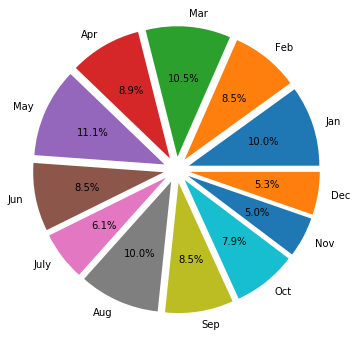

In [9]:
plt.figure(figsize=(6,6))
plt.pie(x=xdat, labels=ydat, autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

Text(0.5, 1.0, 'No. of frauds in WeekOfMonth claimed')

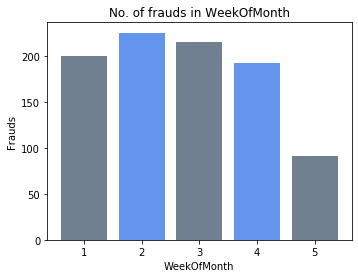

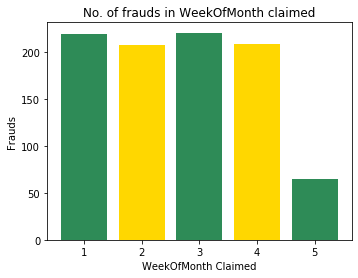

In [10]:
onef=((insur['WeekOfMonth']==1) & (insur['FraudFound_P']==1)).sum();
twof=((insur['WeekOfMonth']==2) & (insur['FraudFound_P']==1)).sum();
thrf=((insur['WeekOfMonth']==3) & (insur['FraudFound_P']==1)).sum();
fouf=((insur['WeekOfMonth']==4) & (insur['FraudFound_P']==1)).sum();
fivf=((insur['WeekOfMonth']==5) & (insur['FraudFound_P']==1)).sum();

xdat=np.array([onef,twof,thrf,fouf,fivf])
ydat=np.array([1,2,3,4,5])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(ydat,xdat, color=['slategray','cornflowerblue'])
plt.xlabel('WeekOfMonth')
plt.ylabel('Frauds')
plt.title('No. of frauds in WeekOfMonth')
#print(pd.crosstab(insur['FraudFound_P'], insur['WeekOfMonth']))
############################################################################################################################
onef=((insur['WeekOfMonthClaimed']==1) & (insur['FraudFound_P']==1)).sum();
twof=((insur['WeekOfMonthClaimed']==2) & (insur['FraudFound_P']==1)).sum();
thrf=((insur['WeekOfMonthClaimed']==3) & (insur['FraudFound_P']==1)).sum();
fouf=((insur['WeekOfMonthClaimed']==4) & (insur['FraudFound_P']==1)).sum();
fivf=((insur['WeekOfMonthClaimed']==5) & (insur['FraudFound_P']==1)).sum();

xdat=np.array([onef,twof,thrf,fouf,fivf])
ydat=np.array([1,2,3,4,5])
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.bar(ydat,xdat, color=['seagreen','gold'])
plt.xlabel('WeekOfMonth Claimed')
plt.ylabel('Frauds')
plt.title('No. of frauds in WeekOfMonth claimed')
#pd.crosstab(insur['FraudFound_P'], insur['WeekOfMonthClaimed'])

Text(0.5, 1.0, '1994')

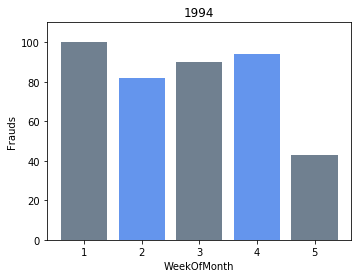

In [9]:
#import matplotlib.axes as axx
onef=((insur['WeekOfMonth']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
twof=((insur['WeekOfMonth']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
thrf=((insur['WeekOfMonth']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
fouf=((insur['WeekOfMonth']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
fivf=((insur['WeekOfMonth']==5) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();

xdat=np.array([onef,twof,thrf,fouf,fivf])
ydat=np.array([1,2,3,4,5])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(ydat,xdat, color=['slategray','cornflowerblue'])
plt.ylim(ymin=0, ymax=110)
plt.xlabel('WeekOfMonth')
plt.ylabel('Frauds')
plt.title('1994')

Text(0.5, 1.0, '1995')

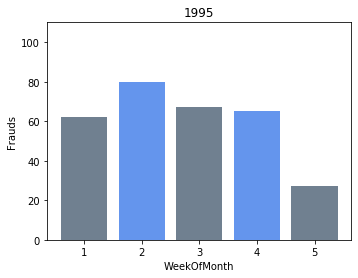

In [10]:
onef=((insur['WeekOfMonth']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
twof=((insur['WeekOfMonth']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
thrf=((insur['WeekOfMonth']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
fouf=((insur['WeekOfMonth']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
fivf=((insur['WeekOfMonth']==5) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();

xdat=np.array([onef,twof,thrf,fouf,fivf])
ydat=np.array([1,2,3,4,5])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(ydat,xdat, color=['slategray','cornflowerblue'])
plt.ylim(ymin=0, ymax=110)
plt.xlabel('WeekOfMonth')
plt.ylabel('Frauds')
plt.title('1995')

Text(0.5, 1.0, '1996')

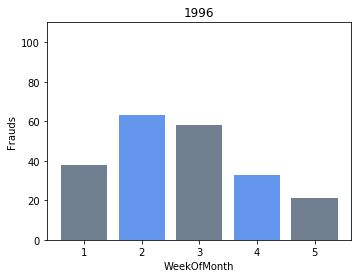

In [11]:
onef=((insur['WeekOfMonth']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
twof=((insur['WeekOfMonth']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
thrf=((insur['WeekOfMonth']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
fouf=((insur['WeekOfMonth']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
fivf=((insur['WeekOfMonth']==5) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();

xdat=np.array([onef,twof,thrf,fouf,fivf])
ydat=np.array([1,2,3,4,5])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(ydat,xdat, color=['slategray','cornflowerblue'])
plt.ylim(ymin=0, ymax=110)
plt.xlabel('WeekOfMonth')
plt.ylabel('Frauds')
plt.title('1996')

Text(0.5, 1.0, 'No. of frauds in DayOfWeek claimed')

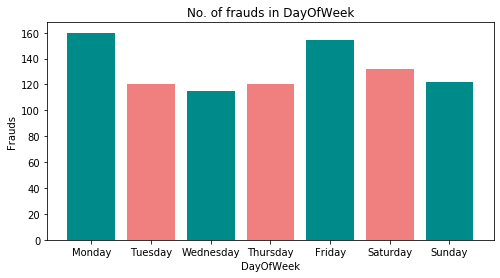

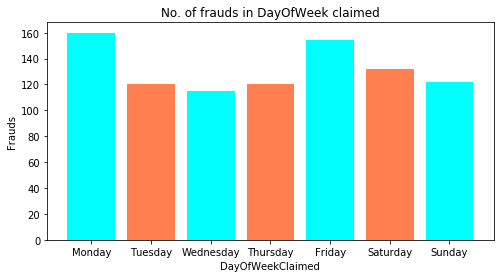

In [14]:
monf=((insur['DayOfWeek']=='Monday') & (insur['FraudFound_P']==1)).sum();
tuef=((insur['DayOfWeek']=='Tuesday') & (insur['FraudFound_P']==1)).sum();
wedf=((insur['DayOfWeek']=='Wednesday') & (insur['FraudFound_P']==1)).sum();
thuf=((insur['DayOfWeek']=='Thursday') & (insur['FraudFound_P']==1)).sum();
frif=((insur['DayOfWeek']=='Friday') & (insur['FraudFound_P']==1)).sum();
satf=((insur['DayOfWeek']=='Saturday') & (insur['FraudFound_P']==1)).sum();
sunf=((insur['DayOfWeek']=='Sunday') & (insur['FraudFound_P']==1)).sum();
xdat=np.array([monf,tuef,wedf,thuf,frif,satf,sunf])
ydat=np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
plt.bar(ydat,xdat, color=['darkcyan','lightcoral'])
plt.xlabel('DayOfWeek')
plt.ylabel('Frauds')
plt.title('No. of frauds in DayOfWeek')
#print(pd.crosstab(insur['FraudFound_P'], insur['DayOfWeek']))
############################################################################################################################
monf=((insur['DayOfWeekClaimed']=='Monday') & (insur['FraudFound_P']==1)).sum();
tuef=((insur['DayOfWeekClaimed']=='Tuesday') & (insur['FraudFound_P']==1)).sum();
wedf=((insur['DayOfWeekClaimed']=='Wednesday') & (insur['FraudFound_P']==1)).sum();
thuf=((insur['DayOfWeekClaimed']=='Thursday') & (insur['FraudFound_P']==1)).sum();
frif=((insur['DayOfWeekClaimed']=='Friday') & (insur['FraudFound_P']==1)).sum();
satf=((insur['DayOfWeekClaimed']=='Saturday') & (insur['FraudFound_P']==1)).sum();
sunf=((insur['DayOfWeekClaimed']=='Sunday') & (insur['FraudFound_P']==1)).sum();
#xdat=np.array([monf,tuef,wedf,thuf,frif,satf,sunf])
#ydat=np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
plt.bar(ydat,xdat, color=['cyan','coral'])
plt.xlabel('DayOfWeekClaimed')
plt.ylabel('Frauds')
plt.title('No. of frauds in DayOfWeek claimed')
#pd.crosstab(insur['FraudFound_P'], insur['DayOfWeekClaimed'])

Text(0.5, 1.0, '1994')

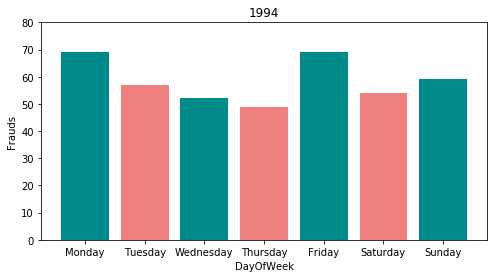

In [12]:
monf=((insur['DayOfWeek']=='Monday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
tuef=((insur['DayOfWeek']=='Tuesday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
wedf=((insur['DayOfWeek']=='Wednesday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
thuf=((insur['DayOfWeek']=='Thursday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
frif=((insur['DayOfWeek']=='Friday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
satf=((insur['DayOfWeek']=='Saturday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
sunf=((insur['DayOfWeek']=='Sunday') & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum();
xdat=np.array([monf,tuef,wedf,thuf,frif,satf,sunf])
ydat=np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
plt.bar(ydat,xdat, color=['darkcyan','lightcoral'])
plt.ylim(ymin=0, ymax=80)
plt.xlabel('DayOfWeek')
plt.ylabel('Frauds')
plt.title('1994')

Text(0.5, 1.0, '1995')

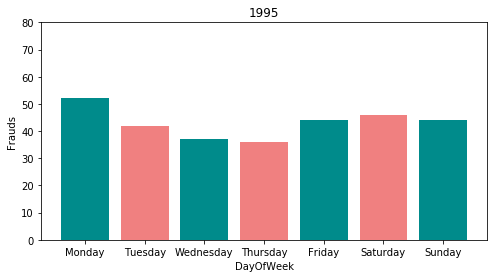

In [13]:
monf=((insur['DayOfWeek']=='Monday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
tuef=((insur['DayOfWeek']=='Tuesday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
wedf=((insur['DayOfWeek']=='Wednesday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
thuf=((insur['DayOfWeek']=='Thursday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
frif=((insur['DayOfWeek']=='Friday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
satf=((insur['DayOfWeek']=='Saturday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
sunf=((insur['DayOfWeek']=='Sunday') & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum();
xdat=np.array([monf,tuef,wedf,thuf,frif,satf,sunf])
ydat=np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
plt.bar(ydat,xdat, color=['darkcyan','lightcoral'])
plt.ylim(ymin=0, ymax=80)
plt.xlabel('DayOfWeek')
plt.ylabel('Frauds')
plt.title('1995')

Text(0.5, 1.0, '1996')

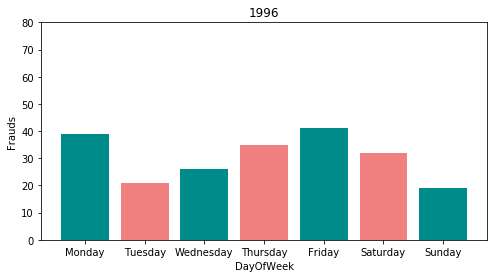

In [14]:
monf=((insur['DayOfWeek']=='Monday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
tuef=((insur['DayOfWeek']=='Tuesday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
wedf=((insur['DayOfWeek']=='Wednesday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
thuf=((insur['DayOfWeek']=='Thursday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
frif=((insur['DayOfWeek']=='Friday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
satf=((insur['DayOfWeek']=='Saturday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
sunf=((insur['DayOfWeek']=='Sunday') & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum();
xdat=np.array([monf,tuef,wedf,thuf,frif,satf,sunf])
ydat=np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
plt.bar(ydat,xdat, color=['darkcyan','lightcoral'])
plt.ylim(ymin=0, ymax=80)
plt.xlabel('DayOfWeek')
plt.ylabel('Frauds')
plt.title('1996')

([<matplotlib.patches.Wedge at 0x1f9223869e8>,
 [Text(-0.06191936075239436, 1.198401432227121, 'Monday'),
  Text(-0.9666421831741971, 0.7110575853671923, 'Tuesday'),
  Text(-1.1979122166093155, -0.07075536232792862, 'Wednesday'),
  Text(-0.6894994135391107, -0.982135712989413, 'Thursday'),
  Text(0.584607400776144, -1.0479666917215265, 'Friday'),
  Text(1.1998694777388494, 0.017698485548229663, 'Saturday'),
  Text(0.8640269912085502, 0.8327408711376547, 'Sunday')],
 [Text(-0.03611962710556337, 0.6990675021324871, '18.3%'),
  Text(-0.563874606851615, 0.4147835914641955, '9.9%'),
  Text(-0.698782126355434, -0.04127396135795836, '12.2%'),
  Text(-0.4022079912311479, -0.5729124992438243, '16.4%'),
  Text(0.34102098378608403, -0.6113139035042238, '19.2%'),
  Text(0.6999238620143288, 0.010324116569800635, '15.0%'),
  Text(0.5040157448716542, 0.48576550816363184, '8.9%')])

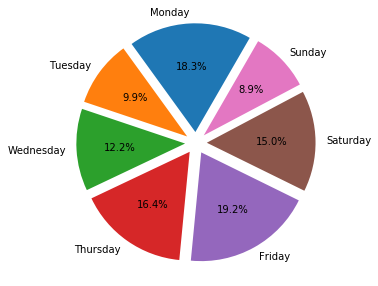

In [18]:
plt.figure(figsize=(5,5))
plt.pie(x=xdat, labels=ydat, autopct='%1.1f%%', startangle=60, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])

AccidentArea,Rural,Urban
FraudFound_P,,
0,1465,13032
1,133,790


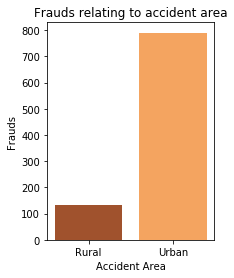

In [19]:
rurf=((insur['AccidentArea']=='Rural') & (insur['FraudFound_P']==1)).sum()
ubrf=((insur['AccidentArea']=='Urban') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Rural','Urban'])
ydat=np.array([rurf,ubrf])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color=['sienna','sandybrown'])
plt.xlabel('Accident Area')
plt.ylabel('Frauds')
plt.title('Frauds relating to accident area')
pd.crosstab(insur['FraudFound_P'], insur['AccidentArea'])

Text(0.5, 1.0, 'Urban')

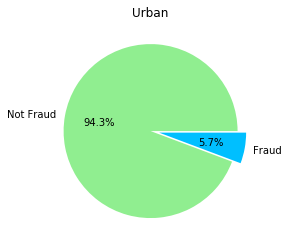

In [5]:
urb0=13032
urb1=790
rur0=1465
rur1=133
plt.pie(x=np.array([urb0,urb1]), labels=np.array(['Not Fraud','Fraud']), colors=['lightgreen','deepskyblue'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Urban')

Text(0.5, 1.0, 'Rural')

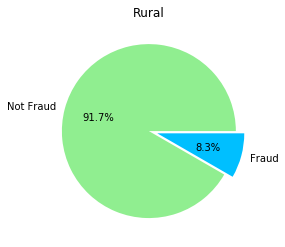

In [6]:
plt.pie(x=np.array([rur0,rur1]), labels=np.array(['Not Fraud','Fraud']), colors=['lightgreen','deepskyblue'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Rural')

([<matplotlib.patches.Wedge at 0x203d1826c18>,
 [Text(0.9892017056386108, 0.4811236697166992, 'Rural'),
  Text(-1.07912915799451, -0.5248621346278088, 'Urban')],
 [Text(0.5395645667119694, 0.262431092572745, '14.4%'),
  Text(-0.6294920088301308, -0.30616957853288845, '85.6%')])

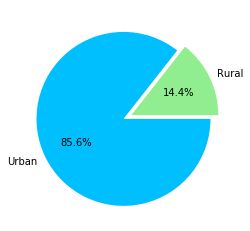

In [20]:
plt.pie(x=ydat, labels=xdat, colors=['lightgreen','deepskyblue'], autopct='%1.1f%%', explode=[0,0.1])

Sex,Female,Male
FraudFound_P,,
0,2315,12182
1,105,818


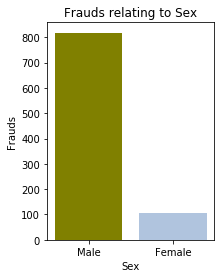

In [21]:
malf=((insur['Sex']=='Male') & (insur['FraudFound_P']==1)).sum()
femf=((insur['Sex']=='Female') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Male','Female'])
ydat=np.array([malf,femf])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color=['olive','lightsteelblue'])
plt.xlabel('Sex')
plt.ylabel('Frauds')
plt.title('Frauds relating to Sex')
pd.crosstab(insur['FraudFound_P'], insur['Sex'])

Text(0.5, 1.0, 'Male')

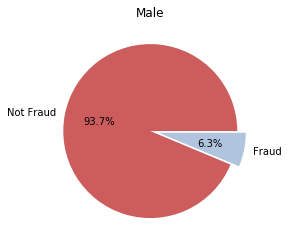

In [7]:
mal0=12182
mal1=818
fem0=2315
fem1=105
plt.pie(x=np.array([mal0,mal1]), labels=np.array(['Not Fraud','Fraud']), colors=['indianred','lightsteelblue'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Male')

Text(0.5, 1.0, 'Female')

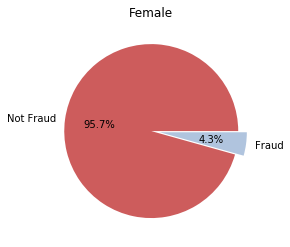

In [8]:
plt.pie(x=np.array([fem0,fem1]), labels=np.array(['Not Fraud','Fraud']), colors=['indianred','lightsteelblue'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Female')

([<matplotlib.patches.Wedge at 0x203d18d12b0>,
 [Text(-1.0304959640352322, 0.3848091320474314, 'Male'),
  Text(1.1241774447889672, -0.4197917014755642, 'Female')],
 [Text(-0.5620887076555812, 0.2098958902076898, '88.6%'),
  Text(0.6557701761268974, -0.24487849252741242, '11.4%')])

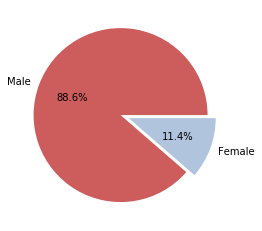

In [22]:
plt.pie(x=ydat, labels=xdat, colors=['indianred','lightsteelblue'], autopct='%1.1f%%', explode=[0,0.1])

MaritalStatus,Divorced,Married,Single,Widow
FraudFound_P,,,,
0,73,9986,4406,32
1,3,639,278,3


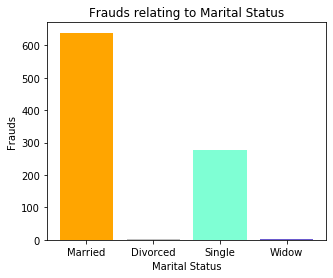

In [23]:
divf=((insur['MaritalStatus']=='Divorced') & (insur['FraudFound_P']==1)).sum()
marf=((insur['MaritalStatus']=='Married') & (insur['FraudFound_P']==1)).sum()
sinf=((insur['MaritalStatus']=='Single') & (insur['FraudFound_P']==1)).sum()
widf=((insur['MaritalStatus']=='Widow') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Married','Divorced','Single','Widow'])
ydat=np.array([marf,divf,sinf,widf])
plt.figure(figsize=(5,4))
plt.bar(xdat,ydat,color=['orange','silver','aquamarine','slateblue'])
plt.xlabel('Marital Status')
plt.ylabel('Frauds')
plt.title('Frauds relating to Marital Status')
pd.crosstab(insur['FraudFound_P'], insur['MaritalStatus'])

([<matplotlib.patches.Wedge at 0x203d19850f0>,
 [Text(-1.1462708990227106, -0.09253662006831243, 'Married'),
  Text(0.7683862417930775, -0.9217280420075709, 'Divorced'),
  Text(1.1462708904941756, 0.09253672571303823, 'Single'),
  Text(0.6105799564872343, 1.0330499100895596, 'Widow')],
 [Text(-0.6478922472737059, -0.05230330699513311, '69.2%'),
  Text(0.44822530771262853, -0.5376746911710829, '0.3%'),
  Text(0.6478922424532295, 0.05230336670736943, '30.1%'),
  Text(0.35617164128421996, 0.602612447552243, '0.3%')])

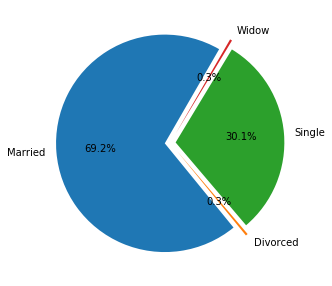

In [24]:
plt.figure(figsize=(5,5))
plt.pie(x=ydat, labels=xdat, startangle=60, explode=[0.05,0.1,0.05,0.1], autopct='%1.1f%%')

VehicleCategory,Sedan,Sport,Utility
FraudFound_P,,,
0,8876,5274,347
1,795,84,44


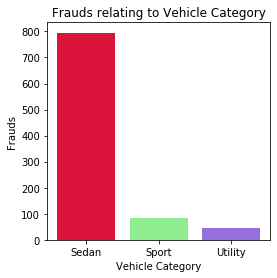

In [25]:
sedf=((insur['VehicleCategory']=='Sedan') & (insur['FraudFound_P']==1)).sum()
spof=((insur['VehicleCategory']=='Sport') & (insur['FraudFound_P']==1)).sum()
utif=((insur['VehicleCategory']=='Utility') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Sedan','Sport','Utility'])
ydat=np.array([sedf,spof,utif])
plt.figure(figsize=(4,4))
plt.bar(xdat,ydat, color=['crimson','lightgreen','mediumpurple'])
plt.xlabel('Vehicle Category')
plt.ylabel('Frauds')
plt.title('Frauds relating to Vehicle Category')
pd.crosstab(insur['FraudFound_P'], insur['VehicleCategory'])

([<matplotlib.patches.Wedge at 0x203d19d94a8>,
 [Text(-0.9972459739905716, 0.46422027891895956, 'Sedan'),
  Text(1.000167880292671, -0.6630717994537739, 'Sport'),
  Text(1.1865679538024714, -0.17904326574606572, 'Utility')],
 [Text(-0.5439523494494026, 0.2532110612285234, '86.1%'),
  Text(0.5834312635040579, -0.38679188301470147, '9.1%'),
  Text(0.6921646397181083, -0.10444190501853833, '4.8%')])

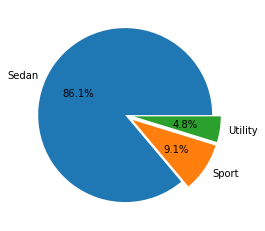

In [26]:
plt.pie(x=ydat, labels=xdat, autopct='%1.1f%%', explode=[0,0.1,0.1])

Text(0.5, 1.0, 'Sedan')

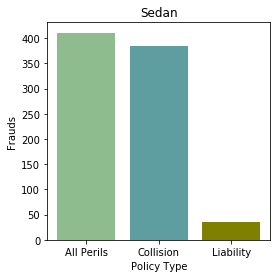

In [27]:
alpf=((insur['PolicyType']=='Sedan - All Perils') & (insur['FraudFound_P']==1)).sum()
colf=((insur['PolicyType']=='Sedan - Collision') & (insur['FraudFound_P']==1)).sum()
liaf=((insur['PolicyType']=='Sedan - Liability') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['All Perils','Collision','Liability'])
ydat=np.array([alpf,colf,liaf])
plt.figure(figsize=(4,4))
plt.bar(xdat,ydat, color={'cadetblue','olive','darkseagreen'})
plt.xlabel('Policy Type')
plt.ylabel('Frauds')
plt.title('Sedan')

([<matplotlib.patches.Wedge at 0x203d17f8208>,
 [Text(0.018712586250341168, 1.0998408244449847, 'All Perils'),
  Text(-0.1677639230573555, -1.087131669173705, 'Collision'),
  Text(1.1889035528133534, -0.16281382652522494, 'Liability')])

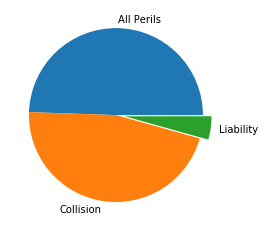

In [28]:
plt.pie(x=ydat, labels=xdat, explode=[0,0,0.1])

Text(0.5, 1.0, 'Sport')

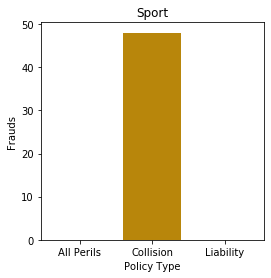

In [29]:
alpf=((insur['PolicyType']=='Sport - All Perils') & (insur['FraudFound_P']==1)).sum()
colf=((insur['PolicyType']=='Sport - Collision') & (insur['FraudFound_P']==1)).sum()
liaf=((insur['PolicyType']=='Sport - Liability') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['All Perils','Collision','Liability'])
ydat=np.array([alpf,colf,liaf])
plt.figure(figsize=(4,4))
plt.bar(xdat,ydat, color={'darkgoldenrod'})
plt.xlabel('Policy Type')
plt.ylabel('Frauds')
plt.title('Sport')

Text(0.5, 1.0, 'Utility')

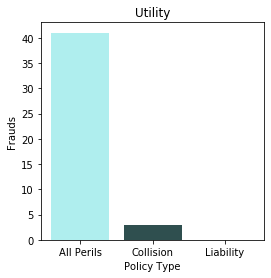

In [60]:
alpf=((insur['PolicyType']=='Utility - All Perils') & (insur['FraudFound_P']==1)).sum()
colf=((insur['PolicyType']=='Utility - Collision') & (insur['FraudFound_P']==1)).sum()
liaf=((insur['PolicyType']=='Utility - Liability') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['All Perils','Collision','Liability'])
ydat=np.array([alpf,colf,liaf])
plt.figure(figsize=(4,4))
plt.bar(xdat,ydat, color={'darkslategray','paleturquoise'})
plt.xlabel('Policy Type')
plt.ylabel('Frauds')
plt.title('Utility')

Fault,Policy Holder,Third Party
FraudFound_P,,
0,10344,4153
1,886,37


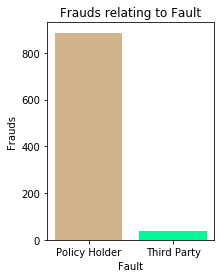

In [61]:
plhf=((insur['Fault']=='Policy Holder') & (insur['FraudFound_P']==1)).sum()
thrf=((insur['Fault']=='Third Party') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Policy Holder','Third Party'])
ydat=np.array([plhf,thrf])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color={'tan','mediumspringgreen'})
plt.xlabel('Fault')
plt.ylabel('Frauds')
plt.title('Frauds relating to Fault')
pd.crosstab(insur['FraudFound_P'], insur['Fault'])

PoliceReportFiled,No,Yes
FraudFound_P,,
0,14085,412
1,907,16


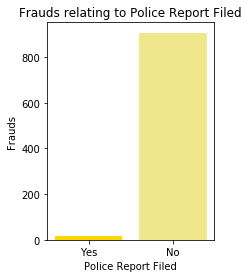

In [62]:
yef=((insur['PoliceReportFiled']=='Yes') & (insur['FraudFound_P']==1)).sum()
nof=((insur['PoliceReportFiled']=='No') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Yes','No'])
ydat=np.array([yef,nof])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color={'khaki','gold'})
plt.xlabel('Police Report Filed')
plt.ylabel('Frauds')
plt.title('Frauds relating to Police Report Filed')
pd.crosstab(insur['FraudFound_P'], insur['PoliceReportFiled'])

WitnessPresent,No,Yes
FraudFound_P,,
0,14413,84
1,920,3


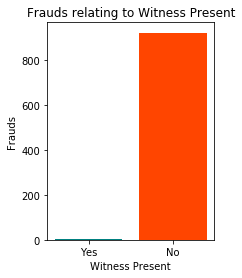

In [63]:
yef=((insur['WitnessPresent']=='Yes') & (insur['FraudFound_P']==1)).sum()
nof=((insur['WitnessPresent']=='No') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['Yes','No'])
ydat=np.array([yef,nof])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color=['teal','orangered'])
plt.xlabel('Witness Present')
plt.ylabel('Frauds')
plt.title('Frauds relating to Witness Present')
pd.crosstab(insur['FraudFound_P'], insur['WitnessPresent'])

Text(0.5, 1.0, 'Witness Present')

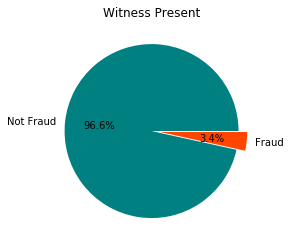

In [17]:
plt.pie(x=np.array([wpy0,wpy1]), labels=np.array(['Not Fraud','Fraud']), colors=['teal','orangered'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Witness Present')

Text(0.5, 1.0, 'Witness Absent')

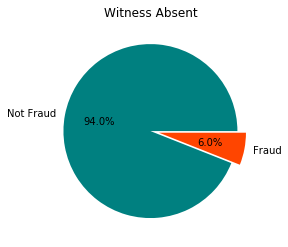

In [16]:
wpn0=14413
wpn1=920
wpy0=84
wpy1=3
plt.pie(x=np.array([wpn0,wpn1]), labels=np.array(['Not Fraud','Fraud']), colors=['teal','orangered'], autopct='%1.1f%%', explode=[0,0.1])
plt.title('Witness Absent')

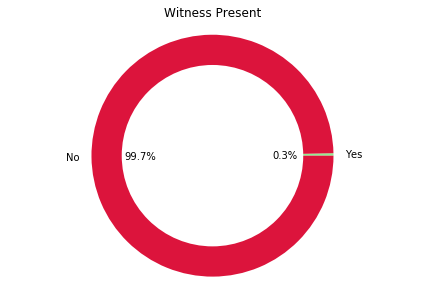

In [64]:
colors = ['lightgreen','crimson']
fig1, ax1 = plt.subplots()
ax1.pie(x=ydat, labels=xdat, autopct='%1.1f%%',colors=colors)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Witness Present")
plt.show()

AgentType,External,Internal
FraudFound_P,,
0,14260,237
1,919,4


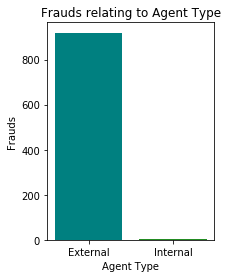

In [20]:
extf=((insur['AgentType']=='External') & (insur['FraudFound_P']==1)).sum()
intf=((insur['AgentType']=='Internal') & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['External','Internal'])
ydat=np.array([extf,intf])
plt.figure(figsize=(3,4))
plt.bar(xdat,ydat, color={'forestgreen','teal'})
plt.xlabel('Agent Type')
plt.ylabel('Frauds')
plt.title('Frauds relating to Agent Type')
pd.crosstab(insur['FraudFound_P'], insur['AgentType'])

Text(0.5, 1.0, 'Agent Type')

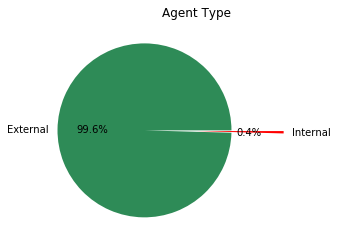

In [21]:
plt.pie(x=ydat, labels=xdat, colors=['seagreen','red'], autopct='%1.1f%%' ,explode=[0.6,0])
plt.title("External")

DriverRating,1,2,3,4
FraudFound_P,,,,
0,3712,3587,3642,3556
1,232,214,242,235


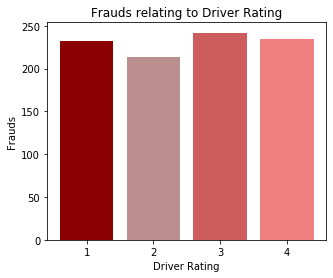

In [67]:
onef=((insur['DriverRating']==1) & (insur['FraudFound_P']==1)).sum()
twof=((insur['DriverRating']==2) & (insur['FraudFound_P']==1)).sum()
thrf=((insur['DriverRating']==3) & (insur['FraudFound_P']==1)).sum()
fouf=((insur['DriverRating']==4) & (insur['FraudFound_P']==1)).sum()
xdat=np.array(['1','2','3','4'])
ydat=np.array([onef,twof,thrf,fouf])
plt.figure(figsize=(5,4))
plt.bar(xdat,ydat, color=['darkred','rosybrown','indianred','lightcoral'])
plt.xlabel('Driver Rating')
plt.ylabel('Frauds')
plt.title('Frauds relating to Driver Rating')
pd.crosstab(insur['FraudFound_P'], insur['DriverRating'])

Text(0.5, 1.0, '1994')

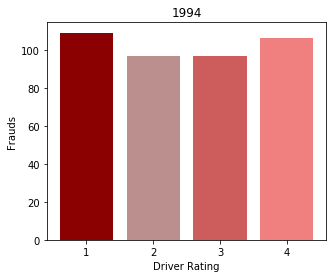

In [68]:
onef=((insur['DriverRating']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum()
twof=((insur['DriverRating']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum()
thrf=((insur['DriverRating']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum()
fouf=((insur['DriverRating']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1994)).sum()
xdat=np.array(['1','2','3','4'])
ydat=np.array([onef,twof,thrf,fouf])
plt.figure(figsize=(5,4))
plt.bar(xdat,ydat, color=['darkred','rosybrown','indianred','lightcoral'])
plt.xlabel('Driver Rating')
plt.ylabel('Frauds')
plt.title('1994')

Text(0.5, 1.0, '1995')

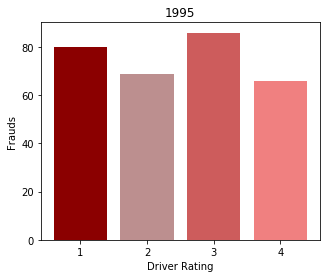

In [69]:
onef=((insur['DriverRating']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum()
twof=((insur['DriverRating']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum()
thrf=((insur['DriverRating']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum()
fouf=((insur['DriverRating']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1995)).sum()
xdat=np.array(['1','2','3','4'])
ydat=np.array([onef,twof,thrf,fouf])
plt.figure(figsize=(5,4))
plt.bar(xdat,ydat, color=['darkred','rosybrown','indianred','lightcoral'])
plt.xlabel('Driver Rating')
plt.ylabel('Frauds')
plt.title('1995')

Text(0.5, 1.0, '1996')

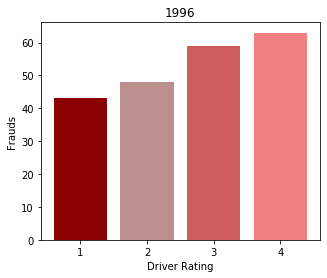

In [70]:
onef=((insur['DriverRating']==1) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum()
twof=((insur['DriverRating']==2) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum()
thrf=((insur['DriverRating']==3) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum()
fouf=((insur['DriverRating']==4) & (insur['FraudFound_P']==1) & (insur['Year']==1996)).sum()
xdat=np.array(['1','2','3','4'])
ydat=np.array([onef,twof,thrf,fouf])
plt.figure(figsize=(5,4))
plt.bar(xdat,ydat, color=['darkred','rosybrown','indianred','lightcoral'])
plt.xlabel('Driver Rating')
plt.ylabel('Frauds')
plt.title('1996')

Text(0.5, 1.0, 'Driver Rating')

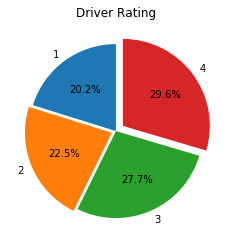

In [71]:
plt.pie(x=ydat, labels=xdat, autopct='%1.1f%%', startangle=90, explode=[0,0.05,0,0.1])
plt.title("Driver Rating")

In [72]:
pd.crosstab(insur['FraudFound_P'], insur['Make']).shape

(2, 19)

In [73]:
pd.crosstab(insur['FraudFound_P'], insur['VehiclePrice'])

VehiclePrice,20000 to 29000,30000 to 39000,40000 to 59000,60000 to 69000,less than 20000,more than 69000
FraudFound_P,,,,,,
0,7658,3358,430,83,993,1975
1,421,175,31,4,103,189


In [74]:
pd.crosstab(insur['FraudFound_P'], insur['Deductible'])

Deductible,300,400,500,700
FraudFound_P,,,,
0,6,13982,216,293
1,2,856,47,18


In [75]:
pd.crosstab(insur['FraudFound_P'], insur['PastNumberOfClaims'])

PastNumberOfClaims,1,2 to 4,more than 4,none
FraudFound_P,,,,
0,3351,5191,1942,4013
1,222,294,68,339


In [76]:
pd.crosstab(insur['FraudFound_P'], insur['AgeOfVehicle'])

AgeOfVehicle,2 years,3 years,4 years,5 years,6 years,7 years,more than 7,new
FraudFound_P,,,,,,,,
0,70,139,208,1262,3220,5482,3775,341
1,3,13,21,95,228,325,206,32


In [77]:
pd.crosstab(insur['FraudFound_P'], insur['NumberOfCars'])

NumberOfCars,1 vehicle,2 vehicles,3 to 4,5 to 8,more than 8
FraudFound_P,,,,,
0,13466,666,343,20,2
1,850,43,29,1,0


In [78]:
pd.crosstab(insur['BasePolicy'], insur['FraudFound_P'])

FraudFound_P,0,1
BasePolicy,,
All Perils,3997,452
Collision,5527,435
Liability,4973,36


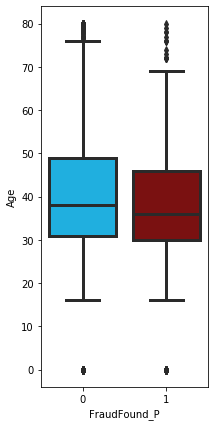

In [30]:
plt.figure(figsize=(3,7))
my_pal = {0: "deepskyblue", 1: "darkred"}
sns.boxplot(x=insur['FraudFound_P'], y=insur['Age'], palette=my_pal, linewidth=3)

In [31]:
pd.crosstab(insur['FraudFound_P'], insur['Year'])

Year,1994,1995,1996
FraudFound_P,,,
0,5733,4894,3870
1,409,301,213


In [32]:
5733+409

6142

Text(0.5, 1.0, 'Percentage Fraud Count by Year')

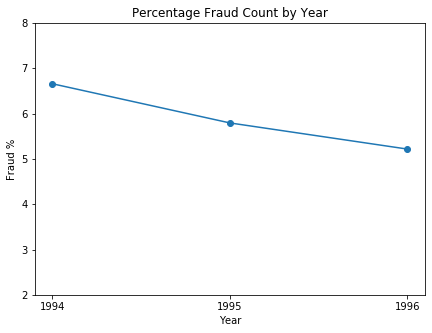

In [82]:
fo=((insur['FraudFound_P']==1) & (insur['Year']==1994)).sum()
fi=((insur['FraudFound_P']==1) & (insur['Year']==1995)).sum()
si=((insur['FraudFound_P']==1) & (insur['Year']==1996)).sum()
ffo=(insur['Year']==1994).sum()
fii=(insur['Year']==1995).sum()
sii=(insur['Year']==1996).sum()
fop=(fo/ffo)*100
fip=(fi/fii)*100
sip=(si/sii)*100
plt.figure(figsize=(7,5))
plt.axis(ymin=2,ymax=8)
plt.plot(['1994','1995','1996'], [fop,fip,sip], marker='o')
plt.xlabel("Year")
plt.ylabel("Fraud %")
plt.title("Percentage Fraud Count by Year")

In [86]:
pd.crosstab(insur['FraudFound_P'], insur['PolicyType'])

PolicyType,Sedan - All Perils,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
FraudFound_P,,,,,,,,,
0,3676,5200,4951,22,300,1,299,27,21
1,411,384,36,0,48,0,41,3,0


In [33]:
pd.crosstab(insur['FraudFound_P'], insur['RepNumber'])

RepNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
FraudFound_P,,,,,,,,,,,,,,,,
0,924,901,889,862,935,876,995,879,934,920,892,930,834,884,928,914
1,63,55,60,50,52,66,74,52,65,66,56,47,58,57,49,53


In [73]:
for i in range(15420):
    if insur.loc[i]['Month']=='Jan':
        insur.at[i,'Month']=1
    elif insur.loc[i]['Month']=='Feb':
        insur.at[i,'Month']=2
    elif insur.loc[i]['Month']=='Mar':
        insur.at[i,'Month']=3
    elif insur.loc[i]['Month']=='Apr':
        insur.at[i,'Month']=4
    elif insur.loc[i]['Month']=='May':
        insur.at[i,'Month']=5
    elif insur.loc[i]['Month']=='Jun':
        insur.at[i,'Month']=6
    elif insur.loc[i]['Month']=='Jul':
        insur.at[i,'Month']=7
    elif insur.loc[i]['Month']=='Aug':
        insur.at[i,'Month']=8
    elif insur.loc[i]['Month']=='Sep':
        insur.at[i,'Month']=9
    elif insur.loc[i]['Month']=='Oct':
        insur.at[i,'Month']=10
    elif insur.loc[i]['Month']=='Nov':
        insur.at[i,'Month']=11
    else:
        insur.at[i,'Month']=12


In [74]:
for i in range(15420):
    if insur.loc[i]['MonthClaimed']=='Jan':
        insur.at[i,'MonthClaimed']=1
    elif insur.loc[i]['MonthClaimed']=='Feb':
        insur.at[i,'MonthClaimed']=2
    elif insur.loc[i]['MonthClaimed']=='Mar':
        insur.at[i,'MonthClaimed']=3
    elif insur.loc[i]['MonthClaimed']=='Apr':
        insur.at[i,'MonthClaimed']=4
    elif insur.loc[i]['MonthClaimed']=='May':
        insur.at[i,'MonthClaimed']=5
    elif insur.loc[i]['MonthClaimed']=='Jun':
        insur.at[i,'MonthClaimed']=6
    elif insur.loc[i]['MonthClaimed']=='Jul':
        insur.at[i,'MonthClaimed']=7
    elif insur.loc[i]['MonthClaimed']=='Aug':
        insur.at[i,'MonthClaimed']=8
    elif insur.loc[i]['MonthClaimed']=='Sep':
        insur.at[i,'MonthClaimed']=9
    elif insur.loc[i]['MonthClaimed']=='Oct':
        insur.at[i,'MonthClaimed']=10
    elif insur.loc[i]['MonthClaimed']=='Nov':
        insur.at[i,'MonthClaimed']=11
    else:
        insur.at[i,'MonthClaimed']=12


In [65]:
insur.loc[7]['MonthClaimed']-insur.loc[7]['Month']

-9

In [66]:
-9+12

3

In [75]:
for i in range(15420):
    if insur.loc[i]['MonthClaimed']-insur.loc[i]['Month'] < 0:
        insur.at[i,'Gap']=insur.loc[i]['MonthClaimed']-insur.loc[i]['Month']+12
    else:
        insur.at[i,'Gap']=insur.loc[i]['MonthClaimed']-insur.loc[i]['Month']


In [77]:
insur['Gap']=insur['Gap'].astype('int')

In [79]:
pd.crosstab(insur['FraudFound_P'], insur['Gap'])

Gap,0,1,2,3,4,5,6,7,8,9,10,11
FraudFound_P,,,,,,,,,,,,
0,10809,2987,349,134,74,36,35,29,20,10,7,7
1,633,224,41,11,6,3,2,0,3,0,0,0


Text(0.5, 1.0, 'No. of months between accident and claim')

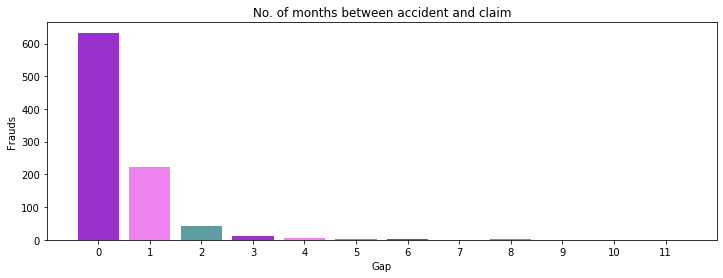

In [80]:
janf=((insur['Gap']==0) & (insur['FraudFound_P']==1)).sum();
febf=((insur['Gap']==1) & (insur['FraudFound_P']==1)).sum();
marf=((insur['Gap']==2) & (insur['FraudFound_P']==1)).sum();
aprf=((insur['Gap']==3) & (insur['FraudFound_P']==1)).sum();
mayf=((insur['Gap']==4) & (insur['FraudFound_P']==1)).sum();
junf=((insur['Gap']==5) & (insur['FraudFound_P']==1)).sum();
julf=((insur['Gap']==6) & (insur['FraudFound_P']==1)).sum();
augf=((insur['Gap']==7) & (insur['FraudFound_P']==1)).sum();
sepf=((insur['Gap']==8) & (insur['FraudFound_P']==1)).sum();
octf=((insur['Gap']==9) & (insur['FraudFound_P']==1)).sum();
novf=((insur['Gap']==10) & (insur['FraudFound_P']==1)).sum();
decf=((insur['Gap']==11) & (insur['FraudFound_P']==1)).sum();
xdat=np.array([janf,febf,marf,aprf,mayf,junf,julf,augf,sepf,octf,novf,decf])
ydat=np.array(['0','1','2','3','4','5','6','7','8','9','10','11'])
plt.figure(figsize=(12,4))
plt.bar(ydat,xdat, color=['darkorchid','violet','cadetblue'])
plt.xlabel('Gap')
plt.ylabel('Frauds')
plt.title('No. of months between accident and claim')

Text(0.5, 1.0, 'Percentage Fraud Count by Gap')

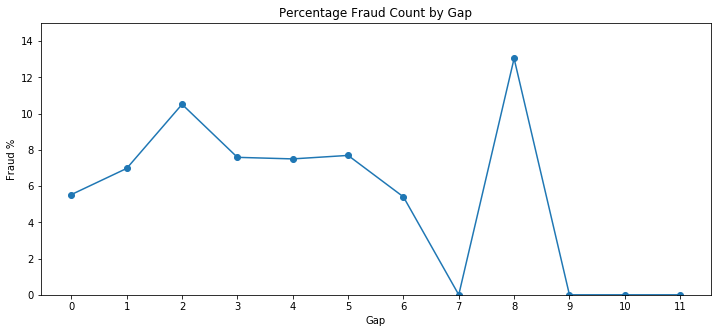

In [85]:
f1=((insur['Gap']==0) & (insur['FraudFound_P']==1)).sum();
f2=((insur['Gap']==1) & (insur['FraudFound_P']==1)).sum();
f3=((insur['Gap']==2) & (insur['FraudFound_P']==1)).sum();
f4=((insur['Gap']==3) & (insur['FraudFound_P']==1)).sum();
f5=((insur['Gap']==4) & (insur['FraudFound_P']==1)).sum();
f6=((insur['Gap']==5) & (insur['FraudFound_P']==1)).sum();
f7=((insur['Gap']==6) & (insur['FraudFound_P']==1)).sum();
f8=((insur['Gap']==7) & (insur['FraudFound_P']==1)).sum();
f9=((insur['Gap']==8) & (insur['FraudFound_P']==1)).sum();
f10=((insur['Gap']==9) & (insur['FraudFound_P']==1)).sum();
f11=((insur['Gap']==10) & (insur['FraudFound_P']==1)).sum();
f12=((insur['Gap']==11) & (insur['FraudFound_P']==1)).sum();
ff1=(insur['Gap']==0).sum();
ff2=(insur['Gap']==1).sum();
ff3=(insur['Gap']==2).sum();
ff4=(insur['Gap']==3).sum();
ff5=(insur['Gap']==4).sum();
ff6=(insur['Gap']==5).sum();
ff7=(insur['Gap']==6).sum();
ff8=(insur['Gap']==7).sum();
ff9=(insur['Gap']==8).sum();
ff10=(insur['Gap']==9).sum();
ff11=(insur['Gap']==10).sum();
ff12=(insur['Gap']==11).sum();
ff1=(f1/ff1)*100;
ff2=(f2/ff2)*100;
ff3=(f3/ff3)*100;
ff4=(f4/ff4)*100;
ff5=(f5/ff5)*100;
ff6=(f6/ff6)*100;
ff7=(f7/ff7)*100;
ff8=(f8/ff8)*100;
ff9=(f9/ff9)*100;
ff10=(f10/ff10)*100;
ff11=(f11/ff11)*100;
ff12=(f12/ff12)*100;
plt.figure(figsize=(12,5))
plt.axis(ymin=0, ymax=15)
plt.plot(['0','1','2','3','4','5','6','7','8','9','10','11'], [ff1,ff2,ff3,ff4,ff5,ff6,ff7,ff8,ff9,ff10,ff11,ff10], marker='o')
plt.xlabel("Gap")
plt.ylabel("Fraud %")
plt.title("Percentage Fraud Count by Gap")